### Importing Relevant Packages

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from pycaret.classification import * 
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

### Importing dataset

In [2]:
data = pd.read_csv('customer_churn.csv')

### Description of dataset

| Column Name          | Column Type  | Column Description                                          |
| -------------------- | ------------ | ------------------------------------------------------------ |
| State                | String       | The state where a customer comes from                        |
| Account length       | Integer      | Number of days a customer has been using services            |
| Area code            | Integer      | The area where a customer comes from                         |
| Phone number         | Alphanumeric | The phone number of a customer                               |
| International plan   | String       | The status of customer international plan                    |
| Voicemail plan       | String       | The status of customer voicemail plan                        |
| No. vmail msgs       | Integer      | Number of voicemail messages sent by a customer              |
| Total day minutes    | Float        | Total call minutes spent by a customer during the day time    |
| Total day calls      | Integer      | Total number of calls made by a customer during the day time |
| Total day charge     | Float        | Total amount charged to a customer during the day time       |
| Total eve minutes    | Float        | Total call minutes spent by a customer during the evening time |
| Total eve calls      | Integer      | Total number of calls made by a customer during the evening time |
| Total eve charge     | Float        | Total amount charged to a customer during the evening time   |
| Total night minutes  | Float        | Total call minutes spent by a customer during the night time |
| Total night calls    | Integer      | Total number of calls made by a customer during the night time |
| Total night charge   | Float        | Total amount charged to a customer during the night time     |
| Total intl minutes   | Float        | Total international call minutes spent by a customer         |
| Total intl calls     | Integer      | Total number of international calls made by a customer       |
| Total int charge     | Float        | Total international call amount charged to a customer        |
| Customer service calls | Integer    | Total number of customer service calls made by a customer    |
| Churn                | Boolean      | Whether a customer is churned or not                         |


In [3]:
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Exploratory Data Analysis

#### Which states have the most number of customers?

In [9]:
customers = data.groupby('state')\
                .size()\
                .to_frame('n_custs')\
                .sort_values(by = 'n_custs', ascending = False)\
                .reset_index()
                

customers_flipped = data.groupby('state')\
                .size()\
                .to_frame('n_custs')\
                .sort_values(by = 'n_custs', ascending = True)\
                .reset_index()

top10 = customers[0:10]
bottom10 = customers_flipped[0:10]

x1 = top10['state']
x2 = bottom10['state']

y1 = top10['n_custs']
y2 = bottom10['n_custs']


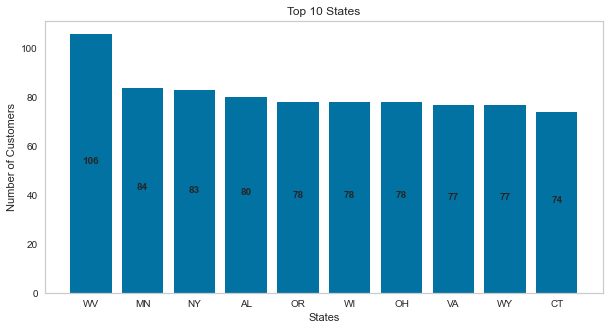

In [10]:
# Plotting top 10
plt.figure(figsize = (10,5))

plt.bar(x1, y1) # top 10

plt.title("Top 10 States")

# adding value labels
for i in range(len(x1)):
        plt.text(i, y1[i]//2, y1[i], ha = 'center', fontweight = 'bold')

plt.xlabel("States")
plt.ylabel("Number of Customers")

plt.grid(False)

plt.show()

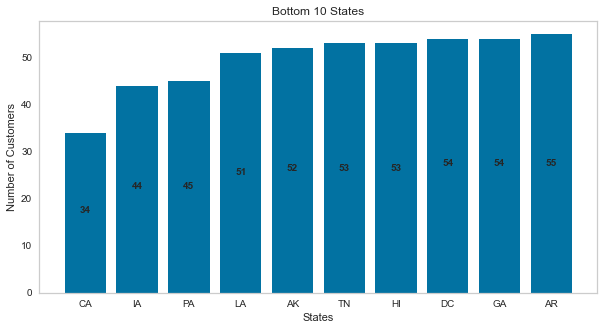

In [11]:
# Plotting top 10
plt.figure(figsize = (10,5))

plt.bar(x2, y2) # bottom 10

plt.title("Bottom 10 States")

# adding value labels
for j in range(len(x2)):
        plt.text(j, y2[j]//2, y2[j], ha = 'center', fontweight = 'bold')

plt.xlabel("States")
plt.ylabel("Number of Customers")

plt.grid(False)

plt.show()

As we can see from the above graphs, the state where most customers come from is West Virginia (WV) and the state where the least number of customers are from is California (CA). 